In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Open and explore data

data_postulaciones = pd.read_csv("POSTULACIONES_FUAS_2022_WEB.csv", sep=";", encoding = "utf-8-sig")
data_postulaciones = data_postulaciones.replace('Ã©','é', regex=True)
data_postulaciones = data_postulaciones.replace('Ã‘','Ñ', regex=True)
data_postulaciones = data_postulaciones.replace('Ã','í', regex=True)
data_postulaciones = data_postulaciones.replace('Tarapací','Tarapacá', regex=True)
data_postulaciones.head()


,ANIO_PROCESO,MRUN,REGION,NOMBRE_REGION,COMUNA,NOMBRE_COMUNA,FEC_NAC_ALU,EDAD,GENERO,PROCESO,COD_DEPE,NEM,ETNIA
0,2022,26,13,Región Metropolitana de Santiago,13130,San Miguel,200212,19,2,FUAS,3,595,1
1,2022,35,7,Región del Maule,7401,Linares,199711,24,1,FUAS,2,600,1
2,2022,51,13,Región Metropolitana de Santiago,13301,Colina,198305,39,2,FUAS,2,560,1
3,2022,55,5,Región de Valparaí­so,5801,Quilpué,198711,34,2,BVP,3,530,1
4,2022,55,5,Región de Valparaí­so,5801,Quilpué,198711,34,2,FUAS,3,530,1


In [3]:
# Filter students by region

students_region_1 = data_postulaciones[data_postulaciones.REGION == 1]
students_region_2 = data_postulaciones[data_postulaciones.REGION == 2]
students_region_3 = data_postulaciones[data_postulaciones.REGION == 3]
students_region_4 = data_postulaciones[data_postulaciones.REGION == 4]
students_region_5 = data_postulaciones[data_postulaciones.REGION == 5]
students_region_6 = data_postulaciones[data_postulaciones.REGION == 6]
students_region_7 = data_postulaciones[data_postulaciones.REGION == 7]
students_region_8 = data_postulaciones[data_postulaciones.REGION == 8]
students_region_9 = data_postulaciones[data_postulaciones.REGION == 9]
students_region_10 = data_postulaciones[data_postulaciones.REGION == 10]
students_region_11 = data_postulaciones[data_postulaciones.REGION == 11]
students_region_12 = data_postulaciones[data_postulaciones.REGION == 12]
students_region_13 = data_postulaciones[data_postulaciones.REGION == 13]
students_region_14 = data_postulaciones[data_postulaciones.REGION == 14]
students_region_15 = data_postulaciones[data_postulaciones.REGION == 15]
students_region_16 = data_postulaciones[data_postulaciones.REGION == 16]

In [4]:
# Filter students by gender (1: male, 2: female)

students_male = data_postulaciones[data_postulaciones.GENERO == 1]
students_female = data_postulaciones[data_postulaciones.GENERO == 2]

In [5]:
# Filter students by type of school (1: Corporación municipal, 2: Municipal DAEM, 3: Particular subvencionado, 4: Particular pagado, 5: Corp. de Adm. Delegado, 6: SLEP)

students_corpmunicipal = data_postulaciones[data_postulaciones.COD_DEPE == "1"]
students_daemmunicipal = data_postulaciones[data_postulaciones.COD_DEPE == "2"]
students_psubvencionado = data_postulaciones[data_postulaciones.COD_DEPE == "3"]
students_ppagado = data_postulaciones[data_postulaciones.COD_DEPE == "4"]
students_cadmdel = data_postulaciones[data_postulaciones.COD_DEPE == "5"]
students_slep = data_postulaciones[data_postulaciones.COD_DEPE == "6"]

In [6]:
# Summary Statistics for Male and Female groups

def get_statistics(df_to_inspect):
    summary_statistics = []
    summary_statistics.append(round(np.mean(df_to_inspect["NEM"]), 2))
    summary_statistics.append(round(np.std(df_to_inspect["NEM"]), 2))
    summary_statistics.append(df_to_inspect["NEM"].median())
    summary_statistics.append(df_to_inspect["NEM"].mode()[0])
    return summary_statistics

female_sstatistics = get_statistics(students_female)

print(f"Female NEM mean = {female_sstatistics[0]}. Female NEM standard deviation = {female_sstatistics[1]}.\
 Female NEM median = {female_sstatistics[2]}. Female NEM mode = {female_sstatistics[3]}.")

male_sstatistics = get_statistics(students_male)

print(f"Male NEM mean = {male_sstatistics[0]}. Male NEM standard deviation = {male_sstatistics[1]}.\
 Male NEM median = {male_sstatistics[2]}. Male NEM mode = {male_sstatistics[3]}.")

Female NEM mean = 572.04. Female NEM standard deviation = 53.56. Female NEM median = 570.0. Female NEM mode = 550.
Male NEM mean = 562.95. Male NEM standard deviation = 52.88. Male NEM median = 560.0. Male NEM mode = 550.


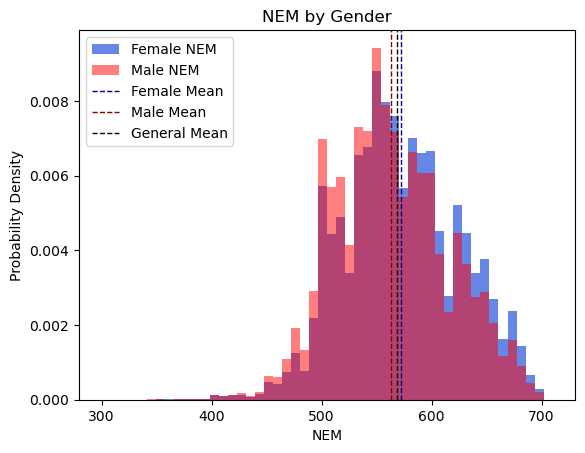

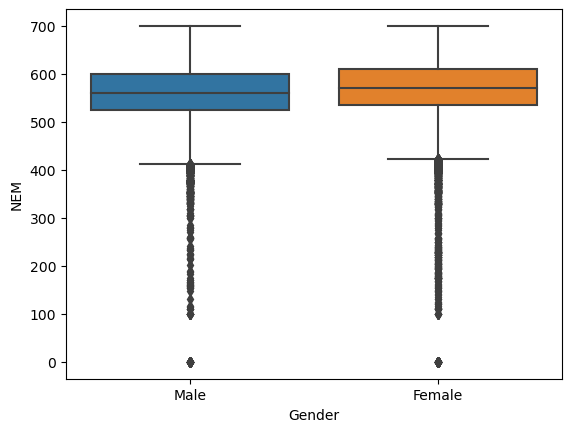

<Figure size 640x480 with 0 Axes>

In [7]:
# Histogram of NEM by Gender
plt.hist(x = students_female["NEM"], alpha=0.8, color="royalblue", density = True, label = "Female NEM", range = [300, 710], bins = 50)
plt.hist(x = students_male["NEM"], alpha=0.5, color="red", density = True, label ="Male NEM", range = [300, 710], bins = 50)
plt.axvline(female_sstatistics[0], color='darkblue', linestyle='dashed', linewidth=1, label = "Female Mean")
plt.axvline(male_sstatistics[0], color='darkred', linestyle='dashed', linewidth=1, label = "Male Mean")
plt.axvline(data_postulaciones["NEM"].mean(), color='k', linestyle='dashed', linewidth=1, label = "General Mean")
plt.legend(loc = "upper left")
plt.xlabel('NEM')
plt.ylabel('Probability Density')
plt.title("NEM by Gender")
plt.show()
plt.clf()


# Boxplot of NEM by Gender
ax = sns.boxplot(data = data_postulaciones, x= "GENERO", y = "NEM")
labels = ["Male", "Female"]
ax.set_xticklabels(labels)
ax.set(xlabel='Gender')
plt.show()
plt.clf()

In [8]:
# Summary statistics for type of schools

corpmunicipal_sstatistics = get_statistics(students_corpmunicipal)

print(f"Corp. Municipal NEM mean = {corpmunicipal_sstatistics[0]}. Corp. Municipal NEM standard deviation = {corpmunicipal_sstatistics[1]}.\
 Corp. Municipal NEM median = {corpmunicipal_sstatistics[2]}. Corp. Municipal NEM mode = {corpmunicipal_sstatistics[3]}.")

daemmunicipal_sstatistics = get_statistics(students_daemmunicipal)

print(f"DAEM NEM mean = {daemmunicipal_sstatistics[0]}. DAEM NEM standard deviation = {daemmunicipal_sstatistics[1]}.\
 DAEM NEM median = {daemmunicipal_sstatistics[2]}. DAEM NEM mode = {daemmunicipal_sstatistics[3]}.")

ppagado_sstatistics = get_statistics(students_ppagado)

print(f"Particular Pagado NEM mean = {ppagado_sstatistics[0]}. Particular Pagado NEM standard deviation = {ppagado_sstatistics[1]}.\
 Particular Pagado NEM median = {ppagado_sstatistics[2]}. Particular Pagado NEM mode = {ppagado_sstatistics[3]}.")

psubvencionado_sstatistics = get_statistics(students_psubvencionado)

print(f"Particular Subvencionado NEM mean = {psubvencionado_sstatistics[0]}. Particular Subvencionado NEM standard deviation = {psubvencionado_sstatistics[1]}.\
 Particular Subvencionado NEM median = {psubvencionado_sstatistics[2]}. Particular Subvencionado NEM mode = {psubvencionado_sstatistics[3]}.")

cadmdel_sstatistics = get_statistics(students_cadmdel)

print(f"Corp. de Adm. Del. NEM mean = {cadmdel_sstatistics[0]}. Corp. de Adm. Del. NEM standard deviation = {cadmdel_sstatistics[1]}.\
 Corp. de Adm. Del. NEM median = {cadmdel_sstatistics[2]}. Corp. de Adm. Del. NEM mode = {cadmdel_sstatistics[3]}.")

slep_sstatistics = get_statistics(students_slep)

print(f"SLEP NEM mean = {slep_sstatistics[0]}. SLEP NEM standard deviation = {slep_sstatistics[1]}.\
 SLEP NEM median = {slep_sstatistics[2]}. SLEP NEM mode = {slep_sstatistics[3]}.")

Corp. Municipal NEM mean = 556.69. Corp. Municipal NEM standard deviation = 51.9. Corp. Municipal NEM median = 553.0. Corp. Municipal NEM mode = 550.
DAEM NEM mean = 567.9. DAEM NEM standard deviation = 51.77. DAEM NEM median = 565.0. DAEM NEM mode = 550.
Particular Pagado NEM mean = 595.91. Particular Pagado NEM standard deviation = 57.88. Particular Pagado NEM median = 600.0. Particular Pagado NEM mode = 600.
Particular Subvencionado NEM mean = 570.99. Particular Subvencionado NEM standard deviation = 51.82. Particular Subvencionado NEM median = 570.0. Particular Subvencionado NEM mode = 550.
Corp. de Adm. Del. NEM mean = 568.39. Corp. de Adm. Del. NEM standard deviation = 51.1. Corp. de Adm. Del. NEM median = 567.0. Corp. de Adm. Del. NEM mode = 550.
SLEP NEM mean = 569.9. SLEP NEM standard deviation = 57.86. SLEP NEM median = 570.0. SLEP NEM mode = 600.


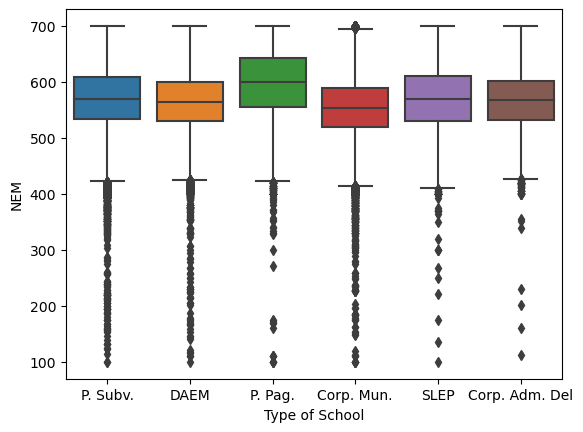

<Figure size 640x480 with 0 Axes>

In [9]:
# Drop rows with NA values in COD_DEPE column
data_postulaciones_cod_depe_filtered = data_postulaciones[data_postulaciones.COD_DEPE != " "]

# Boxplot of NEM by type of school

ax = sns.boxplot(data = data_postulaciones_cod_depe_filtered, x= "COD_DEPE", y = "NEM")
labels = ["P. Subv.", "DAEM", "P. Pag.", "Corp. Mun.", "SLEP", "Corp. Adm. Del"]
ax.set_xticklabels(labels)
ax.set(xlabel='Type of School')
plt.show()
plt.clf()

In [10]:
# Is there a statistically significative difference between P. pag.'s nem results and and Corp Mun.' nem results?

In [11]:
# Summary statistics for region

region_1_sstatistics = get_statistics(students_region_1)
region_2_sstatistics = get_statistics(students_region_2)
region_3_sstatistics = get_statistics(students_region_3)
region_4_sstatistics = get_statistics(students_region_4)
region_5_sstatistics = get_statistics(students_region_5)
region_6_sstatistics = get_statistics(students_region_6)
region_7_sstatistics = get_statistics(students_region_7)
region_8_sstatistics = get_statistics(students_region_8)
region_9_sstatistics = get_statistics(students_region_9)
region_10_sstatistics = get_statistics(students_region_10)
region_11_sstatistics = get_statistics(students_region_11)
region_12_sstatistics = get_statistics(students_region_12)
region_13_sstatistics = get_statistics(students_region_13)
region_14_sstatistics = get_statistics(students_region_13)
region_15_sstatistics = get_statistics(students_region_13)
region_16_sstatistics = get_statistics(students_region_13)

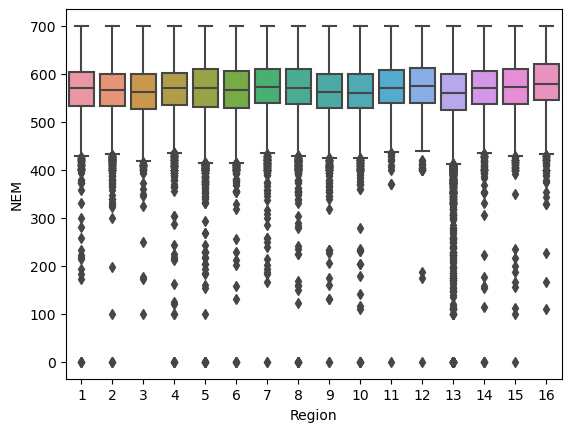

<Figure size 640x480 with 0 Axes>

In [12]:
# Boxplot of NEM by region

ax = sns.boxplot(data = data_postulaciones, x= "REGION", y = "NEM")
ax.set(xlabel='Region')
plt.show()
plt.clf()

In [13]:
# Association of NEM by region

# Scatterplot of NEM by Age
# Covariance of NEM and Age
# Correlation of NEM and Age

# Conclusions